Epoch 1/10
1/1 [==============================] - 0s 431ms/step - loss: 0.9799 - accuracy: 0.0000e+00
Epoch 2/10
1/1 [==============================] - 0s 2ms/step - loss: 0.9715 - accuracy: 0.0000e+00
Epoch 3/10
1/1 [==============================] - 0s 2ms/step - loss: 0.9632 - accuracy: 0.0000e+00
Epoch 4/10
1/1 [==============================] - 0s 3ms/step - loss: 0.9550 - accuracy: 0.0000e+00
Epoch 5/10
1/1 [==============================] - 0s 2ms/step - loss: 0.9468 - accuracy: 0.0000e+00
Epoch 6/10
1/1 [==============================] - 0s 2ms/step - loss: 0.9387 - accuracy: 0.0000e+00
Epoch 7/10
1/1 [==============================] - 0s 2ms/step - loss: 0.9307 - accuracy: 0.0000e+00
Epoch 8/10
1/1 [==============================] - 0s 2ms/step - loss: 0.9227 - accuracy: 0.0000e+00
Epoch 9/10
1/1 [==============================] - 0s 3ms/step - loss: 0.9148 - accuracy: 0.0000e+00
Epoch 10/10
1/1 [==============================] - 0s 3ms/step - loss: 0.9069 - accuracy: 0.0000e+

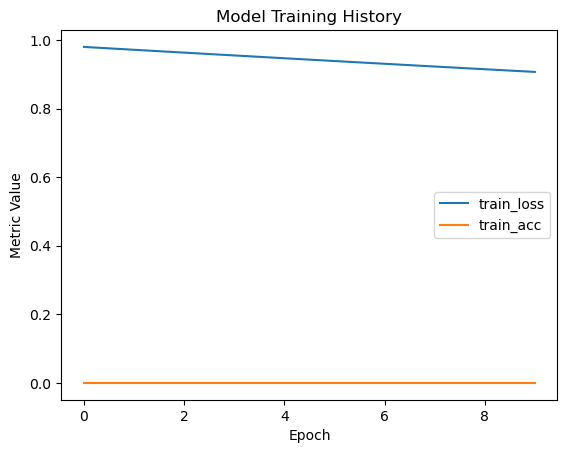

In [2]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the training data from a CSV file
train_data = pd.read_csv('train_data.csv')

# Preprocess the input data
cat_cols = ['gender', 'marital_status', 'has_children']
num_cols = ['age', 'income']

# Convert categorical features to one-hot encoding
train_data = pd.get_dummies(train_data, columns=cat_cols)

# Scale numerical features to a range of [0, 1]
train_data[num_cols] = (train_data[num_cols] - train_data[num_cols].min()) / (train_data[num_cols].max() - train_data[num_cols].min())

# Split the data into input features and target variable
X_train = train_data.drop('purchased', axis=1)
y_train = train_data['purchased']

# Define the neural network model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(16, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32)

# Save the model to a file
model.save('model.h5')

# Print out the predicted results
X_new = X_train.head(5) # Example new data
y_pred = model.predict(X_new)
print('Predicted results:', y_pred)

# Plot the model's training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['accuracy'], label='train_acc')
plt.title('Model Training History')
plt.xlabel('Epoch')
plt.ylabel('Metric Value')
plt.legend()
plt.show()